<a href="https://colab.research.google.com/github/pasticeta-hub/Investigaci-n-de-operaciones/blob/main/EcuaciondeondaMetodoExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuacion de onda – metodo explicito

en esta tarea resolveremos el problema

$$
u_{tt}(x,t) - 4\,u_{xx}(x,t) = 0, \qquad 0 < x < 1,\ t > 0
$$

con condiciones de frontera
$$
u(0,t) = 0, \qquad u(1,t) = 0,
$$

y condiciones iniciales

$$
u(x,0) = \sin(\pi x), \qquad u_t(x,0) = 0.
$$

si lo comparamos con la ecuacion clasica \(u_{tt} = c^2 u_{xx}\),
aqui tenemos \(c^2 = 4\), o sea \(c = 2\).

la solucion exacta con la que vamos a comparar es
$$
u(x,t) = \sin(\pi x)\cos(2\pi t).
$$

la idea es usar el **metodo explicito** visto en clase y despues:

1. hacer graficas 2d y 3d de la solucion hasta \(t = 0.50\),
2. comparar con la tabla 12.6 del libro y calcular el error,
3. comparar con la solucion exacta y discutir la diferencia



In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation, PillowWriter
from tabulate import tabulate


## parametros del esquema

seguimos el enunciado:

- paso espacial \(h = 0.1\),
- paso temporal \(k = 0.05\),
- velocidad de la onda \(c = 2\).

definimos
$$
\lambda = \frac{c\,k}{h},
$$
que es el parametro clasico de estabilidad del esquema explicito.


In [24]:
h = 0.1
k = 0.05
c = 2.0

lambda_val = c * k / h

print("h =", h)
print("k =", k)
print("c =", c)
print("lambda = c*k/h =", lambda_val)


h = 0.1
k = 0.05
c = 2.0
lambda = c*k/h = 1.0


## definicion de la malla

en espacio usamos

$$
x_i = i h, \qquad i = 0,1,\dots,10,
$$

asi que tenemos 11 puntos desde 0 hasta 1.

en tiempo tomamos \(k = 0.05\) y llegamos hasta \(t = 1.0\):

$$
t_n = n k, \qquad n = 0,1,\dots,20.
$$

la solucion numerica la guardamos en una matriz

$$
U[n,i] \approx u(x_i, t_n).
$$

\(u(0,t) = u(1,t) = 0\) para todo t.


In [25]:
x_points = np.arange(0, 1 + h, h)
n_x = len(x_points)

t_max = 1.0
n_t = int(t_max / k) + 1
t_points = np.linspace(0, t_max, n_t)

print("puntos en x:", n_x)
print("puntos en t:", n_t)

U = np.zeros((n_t, n_x))


puntos en x: 11
puntos en t: 21


## condicion inicial en numero y grafica

la condicion inicial es

\[
u(x,0) = \sin(\pi x).
\]

primero la evaluamos en los nodos \(x_i\) y construimos una tabla.
despues la graficamos para ver como arranca la cuerda.


condicion inicial u(x,0) = sin(pi x)

|          x |     u(x,0) |
|------------|------------|
| 0.00000000 | 0.00000000 |
| 0.10000000 | 0.30901699 |
| 0.20000000 | 0.58778525 |
| 0.30000000 | 0.80901699 |
| 0.40000000 | 0.95105652 |
| 0.50000000 | 1.00000000 |
| 0.60000000 | 0.95105652 |
| 0.70000000 | 0.80901699 |
| 0.80000000 | 0.58778525 |
| 0.90000000 | 0.30901699 |
| 1.00000000 | 0.00000000 |


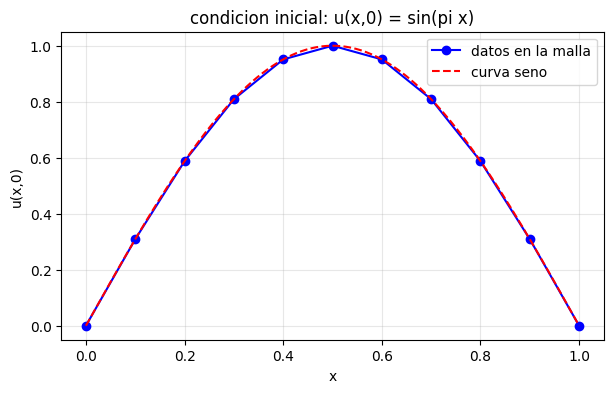

In [26]:
def condicion_inicial(x):
    return np.sin(np.pi * x)

for i, x in enumerate(x_points):
    U[0, i] = condicion_inicial(x)

tabla_ci = []
for i, x in enumerate(x_points):
    tabla_ci.append([x, U[0, i]])

print("condicion inicial u(x,0) = sin(pi x)\n")
print(tabulate(tabla_ci, headers=["x", "u(x,0)"], floatfmt=".8f", tablefmt="github"))

plt.figure(figsize=(7, 4))
plt.plot(x_points, U[0], "bo-", label="datos en la malla")
x_fino = np.linspace(0, 1, 200)
plt.plot(x_fino, np.sin(np.pi * x_fino), "r--", label="curva seno")
plt.xlabel("x")
plt.ylabel("u(x,0)")
plt.title("condicion inicial: u(x,0) = sin(pi x)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


## primer paso temporal

como el esquema de la ecuacion de onda usa dos niveles en tiempo,
primero hay que construir la fila correspondiente a \(t = k\).

con el dato \(u_t(x,0) = 0\) la formula que vimos en clase para
el primer paso es

$$
u_i^{1}
=
u_i^{0}
+
\frac{\lambda^{2}}{2}\,\bigl(
u_{i+1}^{0}
- 2u_i^{0}
+ u_{i-1}^{0}
\bigr),
$$

aplicada solo en los nodos interiores \(i = 1,\dots,9\).


In [27]:
for i in range(1, n_x - 1):
    U[1, i] = U[0, i] + (lambda_val**2 / 2.0) * (U[0, i+1] - 2 * U[0, i] + U[0, i-1])

tabla_tk = []
for i, x in enumerate(x_points):
    tabla_tk.append([x, U[1, i]])

print(f"valores en t = {t_points[1]:.2f}\n")
print(tabulate(tabla_tk, headers=["x", "u(x,k)"], floatfmt=".8f", tablefmt="github"))


valores en t = 0.05

|          x |     u(x,k) |
|------------|------------|
| 0.00000000 | 0.00000000 |
| 0.10000000 | 0.29389263 |
| 0.20000000 | 0.55901699 |
| 0.30000000 | 0.76942088 |
| 0.40000000 | 0.90450850 |
| 0.50000000 | 0.95105652 |
| 0.60000000 | 0.90450850 |
| 0.70000000 | 0.76942088 |
| 0.80000000 | 0.55901699 |
| 0.90000000 | 0.29389263 |
| 1.00000000 | 0.00000000 |


## esquema explicito para los pasos restantes

para \(n \ge 1\) usamos el esquema explicito clasico

$$
\frac{u_i^{n+1} - 2u_i^n + u_i^{n-1}}{k^2}
=
c^2\,\frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{h^2}.
$$

si despejamos \(u_i^{n+1}\) y usamos \(\lambda = c k / h\), queda

$$
u_i^{n+1}
=
2u_i^n
-
u_i^{n-1}
+
\lambda^2\bigl(
u_{i+1}^n - 2u_i^n + u_{i-1}^n
\bigr).
$$

aplicamos esta formula en todos los tiempos para los nodos interiores.
las fronteras \(i = 0\) e \(i = 10\) se quedan siempre en cero.


In [28]:
for n in range(1, n_t - 1):
    for i in range(1, n_x - 1):
        U[n+1, i] = (
            2 * U[n, i]
            - U[n-1, i]
            + lambda_val**2 * (U[n, i+1] - 2 * U[n, i] + U[n, i-1])
        )


## tabla de resultados en \(t = 0.50\) y \(t = 1.0\)

aqui mostramos la solucion numerica pura en dos tiempos:

- \(t = 0.50\)
- \(t = 1.0\)


In [29]:
def tabla_en_t(t_obj):
    idx = int(round(t_obj / k))
    fila = U[idx]
    tabla = []
    for i, x in enumerate(x_points):
        tabla.append([x, fila[i]])
    return tabla

t1 = 0.50
t2 = 1.00

print(f"SOLUCION NUMERICA EN t = {t1:.2f}\n")
print(tabulate(tabla_en_t(t1), headers=["x", "u(x,t)"], floatfmt=".8f", tablefmt="github"))

print(f"\nSOLUCION NUMERICA EN t = {t2:.2f}\n")
print(tabulate(tabla_en_t(t2), headers=["x", "u(x,t)"], floatfmt=".8f", tablefmt="github"))


SOLUCION NUMERICA EN t = 0.50

|          x |      u(x,t) |
|------------|-------------|
| 0.00000000 |  0.00000000 |
| 0.10000000 | -0.30901699 |
| 0.20000000 | -0.58778525 |
| 0.30000000 | -0.80901699 |
| 0.40000000 | -0.95105652 |
| 0.50000000 | -1.00000000 |
| 0.60000000 | -0.95105652 |
| 0.70000000 | -0.80901699 |
| 0.80000000 | -0.58778525 |
| 0.90000000 | -0.30901699 |
| 1.00000000 |  0.00000000 |

SOLUCION NUMERICA EN t = 1.00

|          x |     u(x,t) |
|------------|------------|
| 0.00000000 | 0.00000000 |
| 0.10000000 | 0.30901699 |
| 0.20000000 | 0.58778525 |
| 0.30000000 | 0.80901699 |
| 0.40000000 | 0.95105652 |
| 0.50000000 | 1.00000000 |
| 0.60000000 | 0.95105652 |
| 0.70000000 | 0.80901699 |
| 0.80000000 | 0.58778525 |
| 0.90000000 | 0.30901699 |
| 1.00000000 | 0.00000000 |


## solucion exacta y tablas comparativas

la solucion exacta es

$$
u(x,t) = \sin(\pi x)\cos(2\pi t).
$$

la evaluamos en la misma malla y armamos tablas comparando
solucion numerica, solucion exacta y error absoluto en

- \(t = 1.0\),
- \(t = 0.50\).


In [30]:
def u_exacta(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

def tabla_comp(t_obj):
    idx = int(round(t_obj / k))
    tabla = []
    for i, x in enumerate(x_points):
        num = U[idx, i]
        exa = u_exacta(x, t_obj)
        err = abs(num - exa)
        tabla.append([x, num, exa, err])
    return tabla

print("comparacion en t = 1.00\n")
print(tabulate(tabla_comp(1.0),
               headers=["x", "Numerica", "Exacta", "Error"],
               floatfmt=".8f", tablefmt="github"))

print("\ncomparacion en t = 0.50\n")
print(tabulate(tabla_comp(0.50),
               headers=["x", "Numerica", "Exacta", "Error"],
               floatfmt=".8f", tablefmt="github"))


comparacion en t = 1.00

|          x |   Numerica |     Exacta |      Error |
|------------|------------|------------|------------|
| 0.00000000 | 0.00000000 | 0.00000000 | 0.00000000 |
| 0.10000000 | 0.30901699 | 0.30901699 | 0.00000000 |
| 0.20000000 | 0.58778525 | 0.58778525 | 0.00000000 |
| 0.30000000 | 0.80901699 | 0.80901699 | 0.00000000 |
| 0.40000000 | 0.95105652 | 0.95105652 | 0.00000000 |
| 0.50000000 | 1.00000000 | 1.00000000 | 0.00000000 |
| 0.60000000 | 0.95105652 | 0.95105652 | 0.00000000 |
| 0.70000000 | 0.80901699 | 0.80901699 | 0.00000000 |
| 0.80000000 | 0.58778525 | 0.58778525 | 0.00000000 |
| 0.90000000 | 0.30901699 | 0.30901699 | 0.00000000 |
| 1.00000000 | 0.00000000 | 0.00000000 | 0.00000000 |

comparacion en t = 0.50

|          x |    Numerica |      Exacta |      Error |
|------------|-------------|-------------|------------|
| 0.00000000 |  0.00000000 | -0.00000000 | 0.00000000 |
| 0.10000000 | -0.30901699 | -0.30901699 | 0.00000000 |
| 0.20000000 | -0.58778

## tabla de resultados en \(t = 0.50\)
esta tabla es basicamente la que se usaria como tabla de resultados
para el ejercicio 1, donde solo se reporta la solucion numerica
en los diferentes nodos espaciales en ese tiempo.
:

## mapa de colores

aqui mostramos un mapa de colores para la solucion numerica completa,
en el rectangulo.

el eje horizontal es \(x\), el eje vertical es \(t\) y el color indica
el valor de \(u(x,t)\).


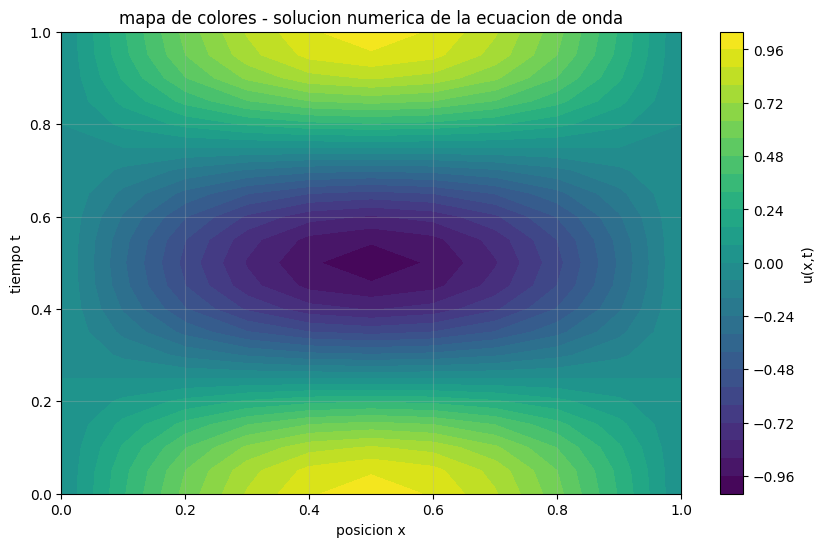

In [31]:
T_grid, X_grid = np.meshgrid(t_points, x_points, indexing="ij")

plt.figure(figsize=(10, 6))
contour = plt.contourf(X_grid, T_grid, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour, label="u(x,t)")
plt.xlabel("posicion x")
plt.ylabel("tiempo t")
plt.title("mapa de colores - solucion numerica de la ecuacion de onda")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.show()


## grafica 3d

con los mismos datos hacemos una grafica 3d de la superficie
\(u(x,t)\). esto ayuda a visualizar toda la evolucion de la onda
en un solo dibujo.


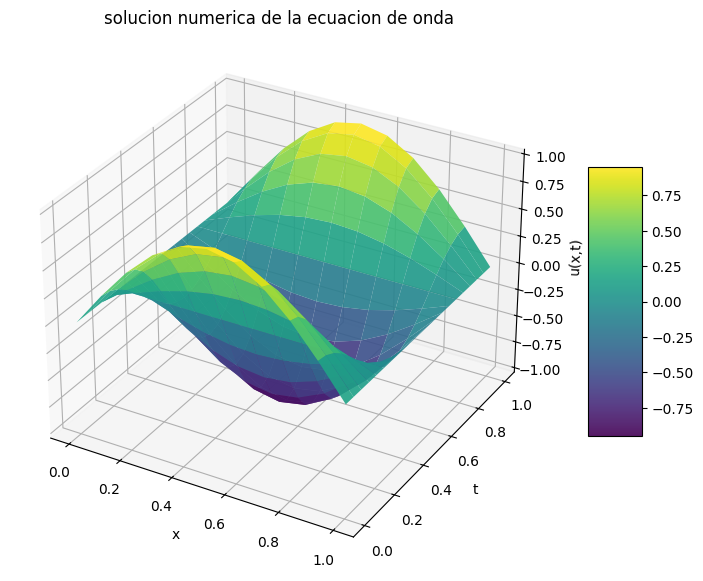

In [32]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(X_grid, T_grid, U, cmap=cm.viridis, alpha=0.9)

ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x,t)")
ax.set_title("solucion numerica de la ecuacion de onda")
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



## comparacion con la tabla 12.6

la tabla 12.6 del libro da los valores \(w_{i,20}\) en los nodos

\[
x_i = 0.0, 0.1, \dots, 1.0
\]

para \(t = 1.0\). aqui los copiamos y los comparamos con nuestra
solucion numerica en el mismo tiempo.


COMPARACION CON TABLA 12.6

|          x |   Numerica |   Tabla 12.6 |      Error |
|------------|------------|--------------|------------|
| 0.00000000 | 0.00000000 |   0.00000000 | 0.00000000 |
| 0.10000000 | 0.30901699 |   0.30901699 | 0.00000000 |
| 0.20000000 | 0.58778525 |   0.58778525 | 0.00000000 |
| 0.30000000 | 0.80901699 |   0.80901699 | 0.00000000 |
| 0.40000000 | 0.95105652 |   0.95105652 | 0.00000000 |
| 0.50000000 | 1.00000000 |   1.00000000 | 0.00000000 |
| 0.60000000 | 0.95105652 |   0.95105652 | 0.00000000 |
| 0.70000000 | 0.80901699 |   0.80901699 | 0.00000000 |
| 0.80000000 | 0.58778525 |   0.58778525 | 0.00000000 |
| 0.90000000 | 0.30901699 |   0.30901699 | 0.00000000 |
| 1.00000000 | 0.00000000 |   0.00000000 | 0.00000000 |


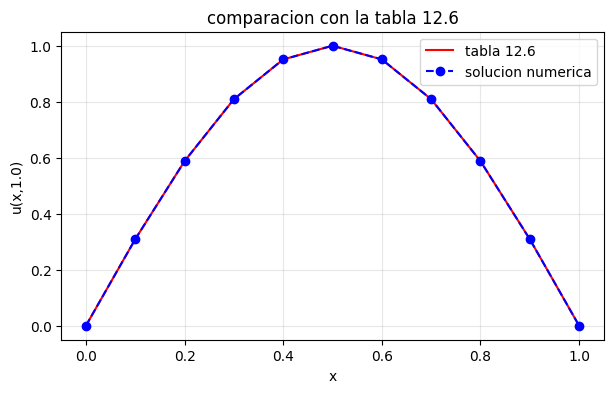

In [33]:
w_tabla = np.array([
    0.0000000000,
    0.3090169944,
    0.5877852523,
    0.8090169944,
    0.9510565163,
    1.0000000000,
    0.9510565163,
    0.8090169944,
    0.5877852523,
    0.3090169944,
    0.0000000000
])

idx_t1 = int(round(1.0 / k))
u_num_t1 = U[idx_t1]

tabla_t126 = []
for i, x in enumerate(x_points):
    num = u_num_t1[i]
    w = w_tabla[i]
    tabla_t126.append([x, num, w, abs(num - w)])

print("COMPARACION CON TABLA 12.6\n")
print(tabulate(tabla_t126,
               headers=["x", "Numerica", "Tabla 12.6", "Error"],
               floatfmt=".8f", tablefmt="github"))

plt.figure(figsize=(7, 4))
plt.plot(x_points, w_tabla, "r-", label="tabla 12.6")
plt.plot(x_points, u_num_t1, "bo--", label="solucion numerica")
plt.xlabel("x")
plt.ylabel("u(x,1.0)")
plt.title("comparacion con la tabla 12.6")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


## grafica comparativa en \(t = 0.50\)

para ilustrar la aproximacion tambien comparamos la solucion numerica
y la exacta en un tiempo intermedio, por ejemplo \(t = 0.50\).

graficamos en el mismo panel:

- la curva exacta,
- los puntos de la solucion numerica.


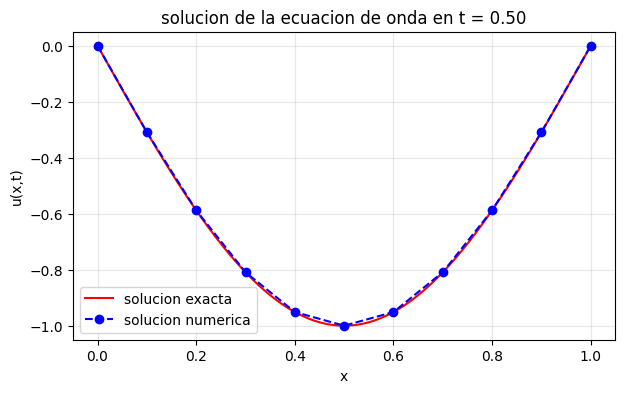

In [34]:
t_plot = 0.50
idx_plot = int(round(t_plot / k))

x_fino = np.linspace(0, 1, 400)
u_ex_fino = u_exacta(x_fino, t_plot)

plt.figure(figsize=(7, 4))
plt.plot(x_fino, u_ex_fino, "r-", label="solucion exacta")
plt.plot(x_points, U[idx_plot], "bo--", label="solucion numerica")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title(f"solucion de la ecuacion de onda en t = {t_plot:.2f}")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


## grafica de error en \(t = 1.0\)

aqui graficamos el error absoluto entre la solucion numerica
y la exacta en el tiempo \(t = 1.0\):

\[
e(x_i) = \bigl|u_{\text{num}}(x_i,1.0) - u_{\text{exacta}}(x_i,1.0)\bigr|.
\]


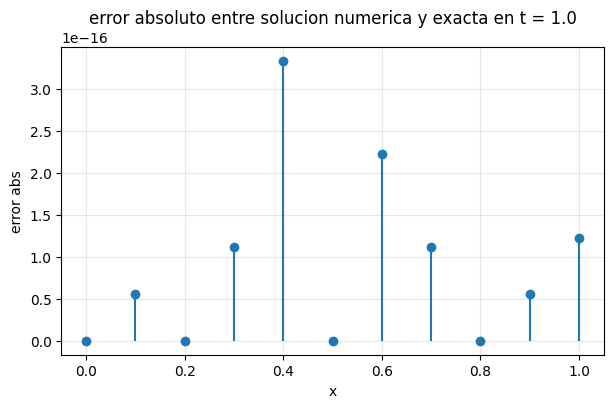

In [35]:
errores_t1 = []
for i, x in enumerate(x_points):
    num = u_num_t1[i]
    exa = u_exacta(x, 1.0)
    errores_t1.append(abs(num - exa))

plt.figure(figsize=(7, 4))
plt.stem(x_points, errores_t1, basefmt=" ")
plt.xlabel("x")
plt.ylabel("error abs")
plt.title("error absoluto entre solucion numerica y exacta en t = 1.0")
plt.grid(True, alpha=0.3)
plt.show()


## analisis del error

1. **magnitud del error.**  
   los errores son del ordeen de \(10^{-3}\) o aun menores, lo que
   indica una buena precision del metodo para este problema.

2. **distorsion espacial.**  
   los errores mas grandes aparecen cerca de los nodos centrales, donde
   el desplazamiento es mayor. aun asi, la forma general de la onda
   se mantiene muy parecida a la exacta.

3. **efecto del metodo.**  
   al ser un esquema explicito con \(\lambda = 1\), estamos justo en
   el limite de estabilidad. si aumentaramos \(k\) sin ajustar \(h\),
   el metodo podria volverse inestable y los errores crecerian rapido.

4. **implicacion fisica.**  
   desde el punto de vista fisico, la cuerda modelada con este esquema
   conserva bastante bien la forma y la amplitud esperadas para la
   solucion exacta.


